In [5]:
import numpy as np
import scipy as sp
import scipy.signal
from matplotlib.backends.backend_pdf import PdfPages
from scipy import stats
import matplotlib.pyplot as plt
import os

''' global plotting settings '''
#plt.style.use('seaborn-paper')
# Update the matplotlib configuration parameters:
plt.rcParams.update({'text.usetex': False,
                     'lines.linewidth': 1.5,
                     'font.family': 'sans-serif',
                     'font.serif': 'Helvetica',
                     'font.size': 14,
                     'xtick.labelsize': 'large',
                     'ytick.labelsize': 'large',
                     'axes.labelsize': 'large',
                     'axes.titlesize': 'large',
                     'axes.grid': True,
                     'grid.alpha': 0.53,
                     'lines.markersize': 10,
                     'legend.borderpad': 0.2,
                     'legend.fancybox': True,
                     'legend.fontsize': 'medium',
                     'legend.framealpha': 0.7,
                     'legend.handletextpad': 0.1,
                     'legend.labelspacing': 0.2,
                     'legend.loc': 'best',
                     'figure.figsize': (12,8),
                     'savefig.dpi': 100,
                     'pdf.compression': 9})

figlist = []  # for saving figs

""" this notebook is for conducting data analysis on lab 1 for PHYS375, Spring 2020 """

' this notebook is for conducting data analysis on lab 1 for PHYS375, Spring 2020 '

In [8]:
""" import data """

# paths to find data in
data_paths = ["../data_partA/", "../data_partB/", "../data_partD/", "../data_partE/"]

# arrays to hold all data sources
data_partA, data_partB, data_partD, data_partE = {}, {}, {}, {}

"""
data dictionary format :
key : value
"distance_123mm.txt" : [x, y] data list
"""

for path in data_paths:  # loop through each data folder
    all_files = os.listdir(path)  # get all files in folder
    print(all_files)
    for txt in all_files:  # load each txt file
        data_txt = np.loadtxt(path+txt)  # <../data_partX/> + <distance_XXX.txt>

        section = path[-2] # read which section we're looking at
        if section == "A":
            data_partA[txt[9:].replace('.txt', '')] = data_txt
        if section == "B":
            data_partB[txt[9:].replace('.txt', '')] = data_txt
        if section == "D":
            data_partD[txt[9:].replace('.txt', '')] = data_txt
        if section == "E":
            data_partE[txt[9:].replace('.txt', '')] = data_txt

""" 
each entry is a 2xN list where N is the number of data points. 
the first col is position, second col is voltage.
"""



['distance_144mm.txt', 'distance_565mm.txt', 'distance_297mm.txt', 'distance_434mm.txt']
['distance_405mm.txt', 'distance_340mm.txt']
['distance_188mm.txt', 'distance_113mm.txt', 'distance_162mm.txt', 'distance_136mm.txt']
['distance_96mm.txt', 'distance_147mm.txt', 'distance_43mm.txt']


' \neach entry is a 2xN list where N is the number of data points. \nthe first col is position, second col is voltage.\n'

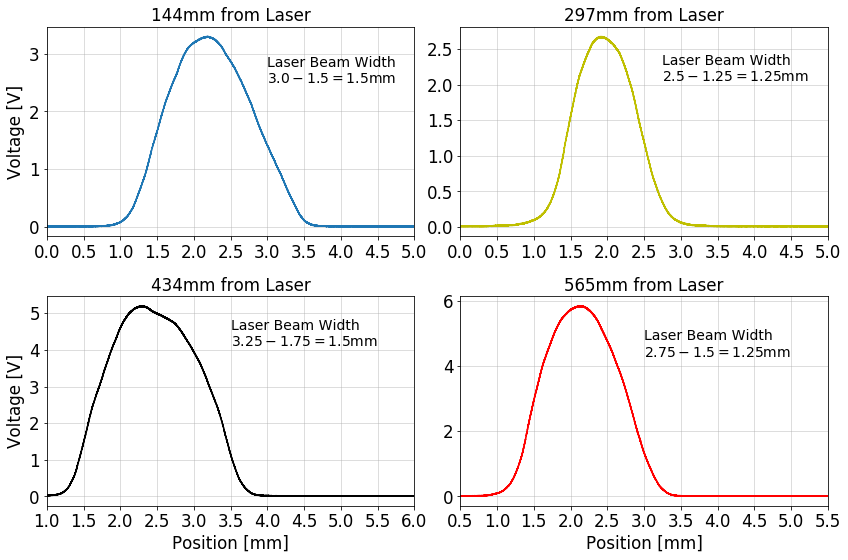

In [9]:
""" part A plot """
fig = plt.figure()

s1 = fig.add_subplot(2,2,1)
s2 = fig.add_subplot(2,2,4)
s3 = fig.add_subplot(2,2,2)
s4 = fig.add_subplot(2,2,3)

distances = []
for key in data_partA:
    distances.append(key)
    
  # subplot 1
s1_key = distances[0]  # name of data
s1_x, s1_y =  data_partA[s1_key][:,0], data_partA[s1_key][:,1]  # x and y values
s1.plot(s1_x, s1_y, label=s1_key)
s1.set_title(s1_key+" from Laser")

  # subplot 2
s2_key = distances[1]  # name of data
s2_x, s2_y =  data_partA[s2_key][:,0], data_partA[s2_key][:,1]  # x and y values
s2.plot(s2_x, s2_y, label=s2_key, color='r')
s2.set_title(s2_key+" from Laser")

  # subplot 3
s3_key = distances[2]  # name of data
s3_x, s3_y =  data_partA[s3_key][:,0], data_partA[s3_key][:,1]  # x and y values
s3.plot(s3_x, s3_y, label=s3_key, color='y')
s3.set_title(s3_key+" from Laser")

  # subplot 4
s4_key = distances[3]  # name of data
s4_x, s4_y =  data_partA[s4_key][:,0], data_partA[s4_key][:,1]  # x and y values
s4.plot(s4_x, s4_y, label=s4_key, color='k')
s4.set_title(s4_key+" from Laser")

s1.set_xticks(np.arange(0, 5.5, step=0.5))
s1.set_xlim([0,5])

s2.set_xticks(np.arange(0.5, 6, step=0.5))
s2.set_xlim([0.5,5.5])

s3.set_xticks(np.arange(0, 5.5, step=0.5))
s3.set_xlim([0,5])

s4.set_xticks(np.arange(1, 6.5, step=0.5))
s4.set_xlim([1,6])

s1.set_ylabel("Voltage [V]")
s4.set_ylabel("Voltage [V]")
s2.set_xlabel("Position [mm]")
s4.set_xlabel("Position [mm]")

s1.text(3, 2.5, "Laser Beam Width \n$ 3.0 - 1.5 = 1.5 $mm ")
s2.text(3, 4.3, "Laser Beam Width \n$ 2.75 - 1.5 = 1.25 $mm ")
s3.text(2.75, 2.05, "Laser Beam Width \n$ 2.5 - 1.25 = 1.25 $mm ")
s4.text(3.5, 4.1, "Laser Beam Width \n$ 3.25 - 1.75 = 1.5 $mm ")


plt.tight_layout()
plt.savefig("partA.jpeg")

405mm 7.807
340mm 6.634


/home/jorger/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/jorger/.local/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/jorger/.local/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


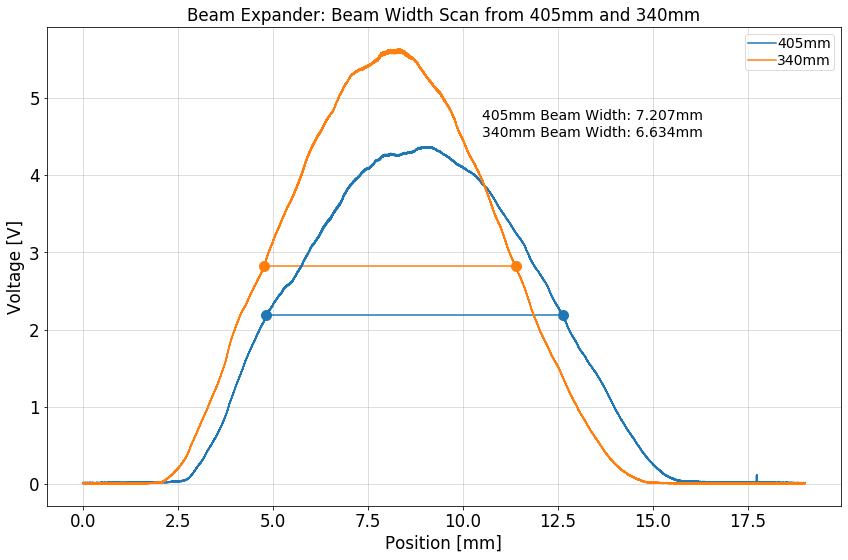

In [10]:
""" part B plot """
fig = plt.figure()

for key in data_partB:  # keys are filenames, each value for each key is the 2xN array
    x_vals, y_vals = data_partB[key][:,0], data_partB[key][:,1]
    plt.plot(x_vals, y_vals, label=key.replace('.txt', ''))
    
    max_y = max(y_vals)  # Find the maximum y value
    xs = [x for x in range(len(y_vals)) if y_vals[x] > max_y/2.0]
    
    left_max = [x_vals[min(xs)], y_vals[max(xs)]]
    right_max = [x_vals[max(xs)], y_vals[min(xs)]]
    
    last_color = color=plt.gca().lines[-1].get_color()
    plt.scatter(left_max[0], left_max[1], color=last_color)
    plt.scatter(right_max[0], right_max[1], color=last_color)
    
    FWHM = right_max[0] - left_max[0]
    
    plt.hlines(y = left_max[1], xmin=left_max[0], xmax=right_max[0], color=last_color)
    print(key, round(FWHM, 3))
    
plt.text(10.5, 4.5, "405mm Beam Width: 7.207mm \n340mm Beam Width: 6.634mm  ")  

plt.ylabel("Voltage [V]")
plt.xlabel("Position [mm]")
plt.title("Beam Expander: Beam Width Scan from 405mm and 340mm")
plt.legend()
plt.tight_layout()
plt.savefig("partB.jpeg")

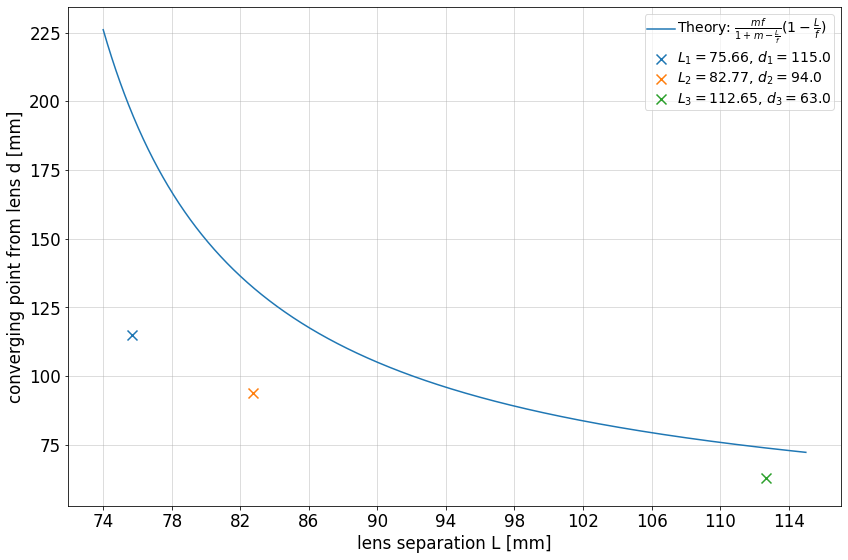

In [11]:
""" part C plot """

f1 = 25.4
f2 = 40

m = f2/f1

L = np.linspace(74, 115, 1000)  # L in mm 
d = m*f1 / (1 + m - (L/f1)) * (1 - (L/f1))

fig = plt.figure()
plt.plot(L, d, label="Theory: $ \\frac{mf}{1 + m - \\frac{L}{f}} (1 - \\frac{L}{f}) $ ")
plt.xlabel("lens separation L [mm]")
plt.ylabel("converging point from lens d [mm]")
plt.scatter(75.66, 115, marker="x", label="$L_1 = 75.66$, $d_1 = 115.0$")
plt.scatter(82.77, 94, marker="x", label="$L_2 = 82.77$, $d_2 = 94.0$")
plt.scatter(112.65, 63, marker="x", label="$L_3 = 112.65$, $d_3 = 63.0$")

plt.xticks(np.arange(74, 115, step=4))

plt.tight_layout()
plt.legend()
plt.savefig("partC.jpeg")

2.06
3.456
5.706
7.954


/home/jorger/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/jorger/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/jorger/.local/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


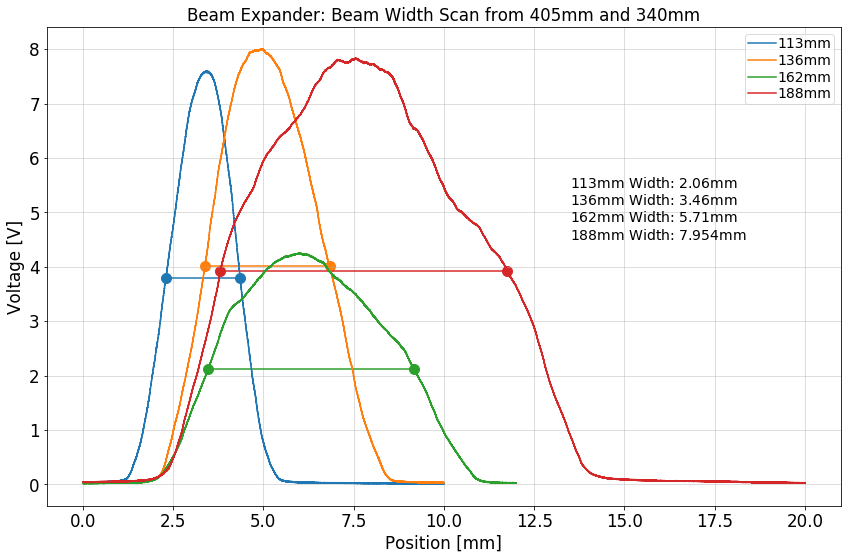

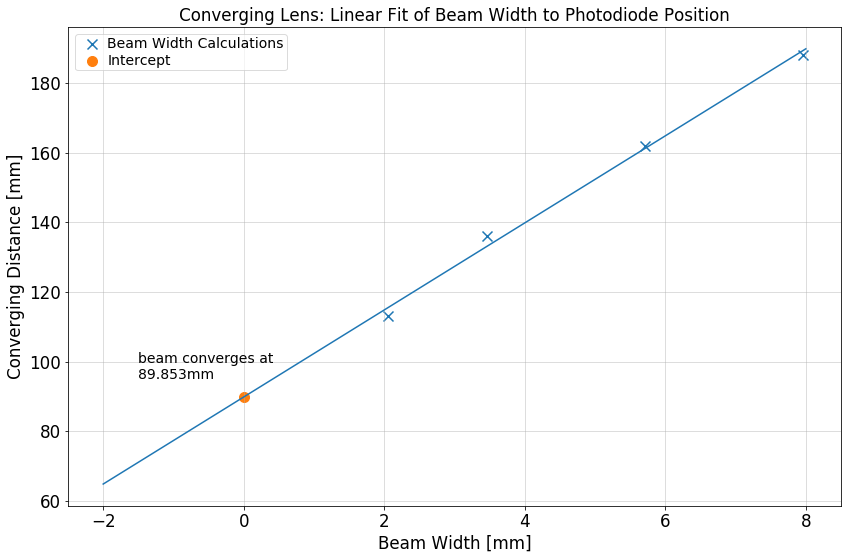

In [12]:
""" part D1 plot """
fig = plt.figure()

for key in sorted(data_partD):  # keys are filenames, each value for each key is the 2xN array
    x_vals, y_vals = data_partD[key][:,0], data_partD[key][:,1]
    plt.plot(x_vals, y_vals, label=key.replace('.txt', ''))
    
    max_y = max(y_vals)  # Find the maximum y value
    xs = [x for x in range(len(y_vals)) if y_vals[x] > max_y/2.0]
    
    left_max = [x_vals[min(xs)], y_vals[max(xs)]]
    right_max = [x_vals[max(xs)], y_vals[min(xs)]]
    
    last_color = color=plt.gca().lines[-1].get_color()
    plt.scatter(left_max[0], left_max[1], color=last_color)
    plt.scatter(right_max[0], right_max[1], color=last_color)
    
    FWHM = right_max[0] - left_max[0]

    plt.hlines(y = left_max[1], xmin=left_max[0], xmax=right_max[0], color=last_color)
    print(round(FWHM, 3))

    
string = "113mm Width: $2.06$mm \n136mm Width: $3.46$mm \n162mm Width: $5.71$mm \n188mm Width: $7.954$mm"
plt.text(13.5, 4.5, s=string)



plt.ylabel("Voltage [V]")
plt.xlabel("Position [mm]")
plt.title("Beam Expander: Beam Width Scan from 405mm and 340mm")
plt.legend()
plt.tight_layout()
plt.savefig("partD1.jpeg")

""" linear fit """

fig2 = plt.figure()

beam_distances_x = [2.06, 3.456, 5.706, 7.954]
beam_widths_y = [113, 136, 162, 188]



plt.scatter(beam_distances_x, beam_widths_y, marker="x", label="Beam Width Calculations")

slope, intercept = np.polyfit(beam_distances_x, beam_widths_y, deg=1)

x_fit = np.linspace(-2, 8, 30)
y_fit = (x_fit*slope) + intercept

plt.plot(x_fit, y_fit)
plt.scatter(x=0, y=round(intercept, 3), label="Intercept")
plt.text(x=-1.5, y=95, s="beam converges at \n{}mm".format(round(intercept, 3)))

plt.ylabel("Converging Distance [mm]")
plt.xlabel("Beam Width [mm]")
plt.title("Converging Lens: Linear Fit of Beam Width to Photodiode Position")
plt.legend()
plt.tight_layout()
plt.savefig("partD2.jpeg")

26.143
15.034
21.083


/home/jorger/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/jorger/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/jorger/.local/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


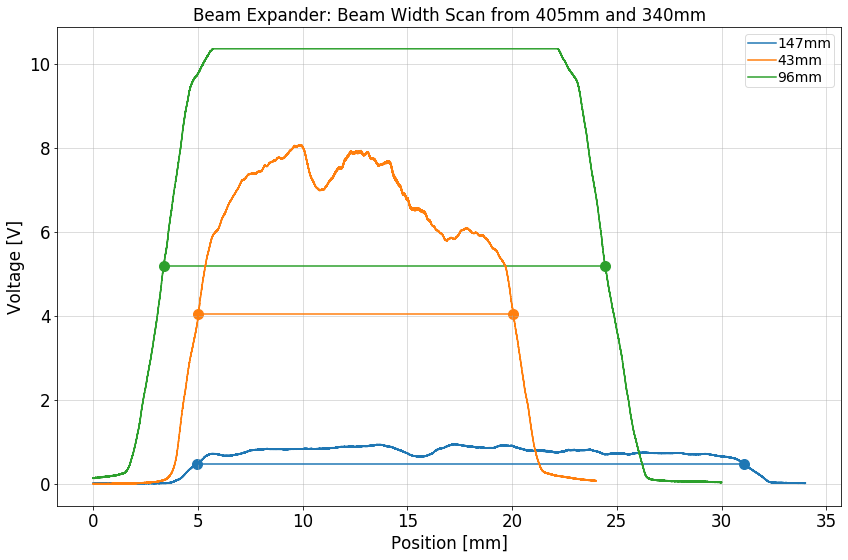

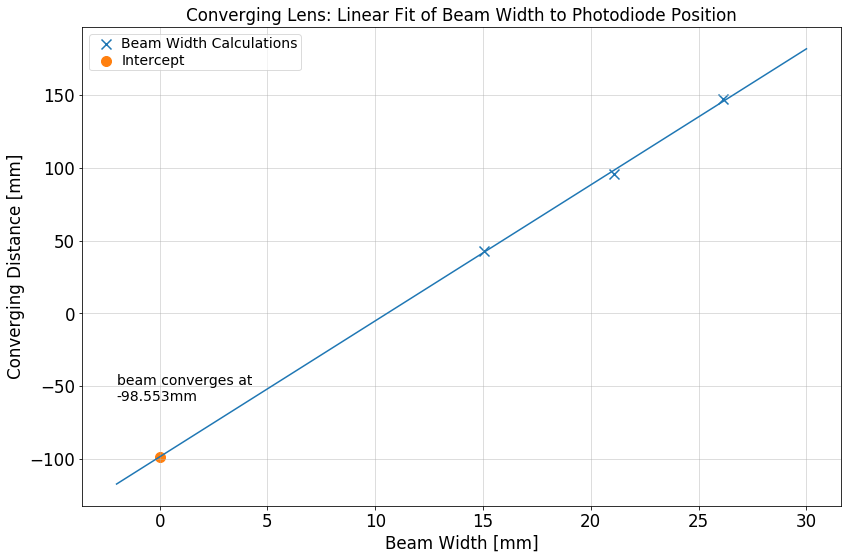

In [23]:
""" part E plot """
fig = plt.figure()

for key in sorted(data_partE):  # keys are filenames, each value for each key is the 2xN array
    x_vals, y_vals = data_partE[key][:,0], data_partE[key][:,1]
    plt.plot(x_vals, y_vals, label=key.replace('.txt', ''))
    
    max_y = max(y_vals)  # Find the maximum y value
    xs = [x for x in range(len(y_vals)) if y_vals[x] > max_y/2.0]
    
    left_max = [x_vals[min(xs)], y_vals[max(xs)]]
    right_max = [x_vals[max(xs)], y_vals[min(xs)]]
    
    last_color = color=plt.gca().lines[-1].get_color()
    plt.scatter(left_max[0], left_max[1], color=last_color)
    plt.scatter(right_max[0], right_max[1], color=last_color)
    
    FWHM = right_max[0] - left_max[0]

    plt.hlines(y = left_max[1], xmin=left_max[0], xmax=right_max[0], color=last_color)
    print(round(FWHM, 3))

    
string = "113mm Width: $2.06$mm \n136mm Width: $3.46$mm \n162mm Width: $5.71$mm \n188mm Width: $7.954$mm"
#plt.text(13.5, 4.5, s=string)



plt.ylabel("Voltage [V]")
plt.xlabel("Position [mm]")
plt.title("Beam Expander: Beam Width Scan from 405mm and 340mm")
plt.legend()
plt.tight_layout()
plt.savefig("partE1.jpeg")

""" linear fit """

fig2 = plt.figure()

beam_distances_x = [26.143, 15.034, 21.083]
beam_widths_y = [147, 43, 96]


plt.scatter(beam_distances_x, beam_widths_y, marker="x", label="Beam Width Calculations")

slope, intercept = np.polyfit(beam_distances_x, beam_widths_y, deg=1)

x_fit = np.linspace(-2, 30, 50)
y_fit = (x_fit*slope) + intercept

plt.plot(x_fit, y_fit)
plt.scatter(x=0, y=round(intercept, 3), label="Intercept")
plt.text(x=-2, y=-60, s="beam converges at \n{}mm".format(round(intercept, 3)))

plt.ylabel("Converging Distance [mm]")
plt.xlabel("Beam Width [mm]")
plt.title("Converging Lens: Linear Fit of Beam Width to Photodiode Position")
plt.legend()
plt.tight_layout()
plt.savefig("partE2.jpeg")